# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

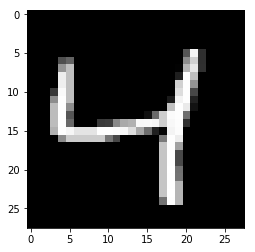

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
encoding_dim = 32 
image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size),name='inputs')
targets_ =tf.placeholder(tf.float32,(None, image_size),name='targets') 

encoded =tf.layers.dense(inputs_,encoding_dim, activation =tf.nn.relu) 

logits =tf.layers.dense(encoded, image_size ,activation=None) 
decoded = tf.nn.sigmoid(logits,name='outputs')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [9]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6936
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6861
Epoch: 1/20... Training loss: 0.6817
Epoch: 1/20... Training loss: 0.6760
Epoch: 1/20... Training loss: 0.6695
Epoch: 1/20... Training loss: 0.6616
Epoch: 1/20... Training loss: 0.6514
Epoch: 1/20... Training loss: 0.6419
Epoch: 1/20... Training loss: 0.6305
Epoch: 1/20... Training loss: 0.6165
Epoch: 1/20... Training loss: 0.6017
Epoch: 1/20... Training loss: 0.5868
Epoch: 1/20... Training loss: 0.5722
Epoch: 1/20... Training loss: 0.5532
Epoch: 1/20... Training loss: 0.5343
Epoch: 1/20... Training loss: 0.5181
Epoch: 1/20... Training loss: 0.4961
Epoch: 1/20... Training loss: 0.4808
Epoch: 1/20... Training loss: 0.4588
Epoch: 1/20... Training loss: 0.4415
Epoch: 1/20... Training loss: 0.4297
Epoch: 1/20... Training loss: 0.4112
Epoch: 1/20... Training loss: 0.4012
Epoch: 1/20... Training loss: 0.3872
Epoch: 1/20... Training loss: 0.3717
Epoch: 1/20... Training loss: 0.3617
E

Epoch: 1/20... Training loss: 0.2007
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.2014
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.1985
Epoch: 1/20... Training loss: 0.2005
Epoch: 1/20... Training loss: 0.1968
Epoch: 1/20... Training loss: 0.1973
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1951
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1890
E

Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1532
E

Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1316
E

Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1276
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1251
E

Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1215
E

Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1092
E

Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1168
Epoch: 6/20... Training loss: 0.1090
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1105
Epoch: 6/20... Training loss: 0.1095
E

Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1081
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1078
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1047
E

Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0989
E

Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0938
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0992
E

Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0958
E

Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Train

Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.1007
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.1005
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.1007
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0996
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0889
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0996
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0896
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0993
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0993
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0975
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0982
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0887
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.1000
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0886
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

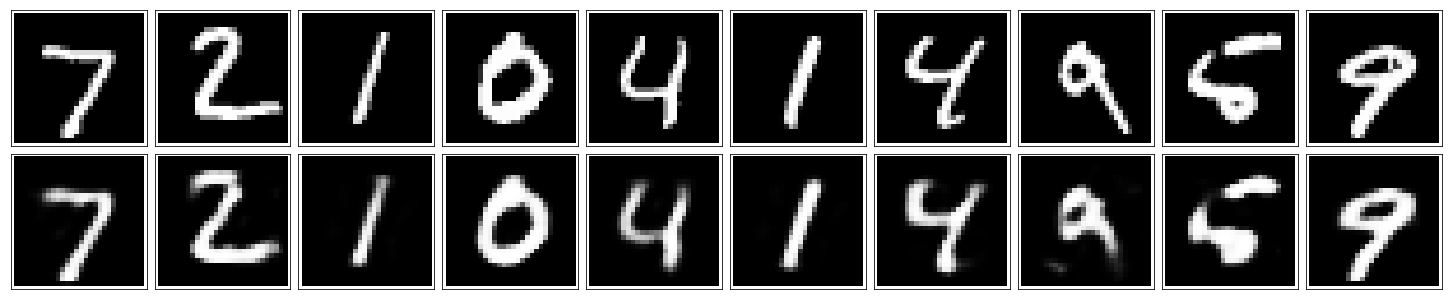

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [11]:
sess.close()